# Exploratory Data Analysis

In [89]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math as m

In [90]:
df = pd.read_csv('haberman.csv')


</h1>About The Dataset</h1>

Dataset is about survival status of breast cancer patients who have gone surgery at chicago illionois hospital between 1958 and 1970.

4 attributes

1)age age of patient at time of surgery.

2)year in which operation took place.

3)number of positive auxillary nodes detected.

4)Survival status(class attribute)

       1 = the patient survived 5 years or longer
       2 = the patient died within 5 years


In [91]:
#number of Data points
len(df)

306

# number of missing values


In [92]:
df.isna().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

# Checking if dataset is balanced

In [93]:
#checking if dataset is balanced .i.e whether we have sufficient data from two classes
print("Percentage of survived",(df.groupby('status')['age'].count().iloc[0]*100/(df.groupby('status')['age'].count().iloc[0]+df.groupby('status')['age'].count().iloc[1])).round(2))
print("Percentage of didn't survive",(df.groupby('status')['age'].count().iloc[1]*100/(df.groupby('status')['age'].count().iloc[0]+df.groupby('status')['age'].count().iloc[1])).round(2))


Percentage of survived 73.53
Percentage of didn't survive 26.47


In [94]:
df.groupby('status')['age'].count()

status
1    225
2     81
Name: age, dtype: int64

In [95]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


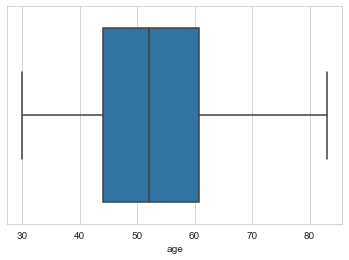

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


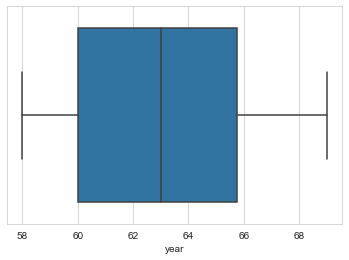

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


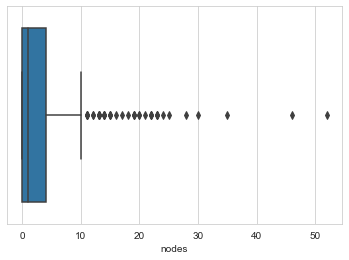

In [96]:


sn.boxplot(df['age'])
plt.show()

sn.boxplot(df['year'])
plt.show()
sn.boxplot(df['nodes'])
plt.show()

Maximum number of nodes = 52

few large value in number of nodes shift data point to right.
Age is normally distributed.
year close to uniform with greater weights to beginning of year abd less to later part.

 # 3/4 of data consists of those who survived
 
 **Sepration between two classes using pair plots
 


C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: hue, hue_order. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


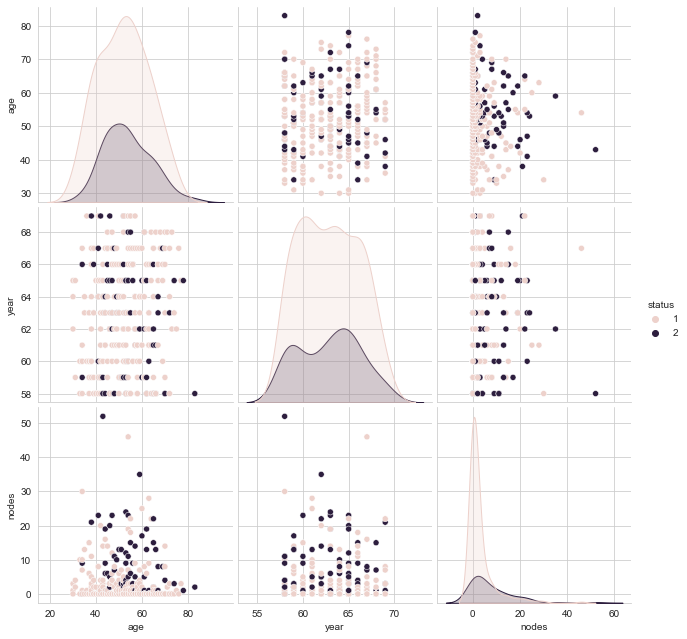

In [97]:
#Plotting distribution by age
sn.set_style("whitegrid");
sn.pairplot(df,'status',['age', 'year', 'nodes'],size = 3)


Strict separation not visible between the two classes.

We however can combine nodes and age to get decent degree of separation. as visible from their pair plots.


# Ditribution of age , nodes and year

Text(0.5, 1.0, 'year')

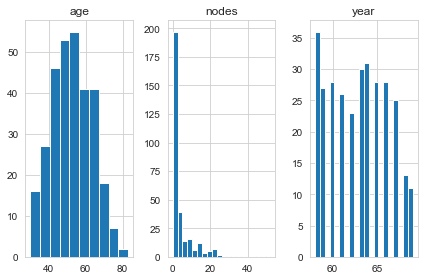

In [98]:
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].hist(df['age'])
axs[0].set_title("age")
axs[0].set_label("age")
  
axs[1].hist(df['nodes'], bins=20)
axs[1].set_title("nodes")

axs[2].hist(df['year'], bins=20)
axs[2].set_title("year")

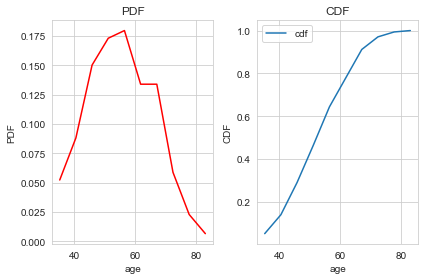

In [99]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
axs[0].plot(bin_edges[1:],pdf,label = 'pdf',color = 'red')
axs[0].set_title('PDF')
axs[0].set_xlabel('age')
axs[0].set_ylabel('PDF')

axs[1].plot(bin_edges[1:],cdf,label = 'cdf')
axs[1].set_title('CDF')
axs[1].set_xlabel('age')
axs[1].set_ylabel('CDF')
plt.legend()

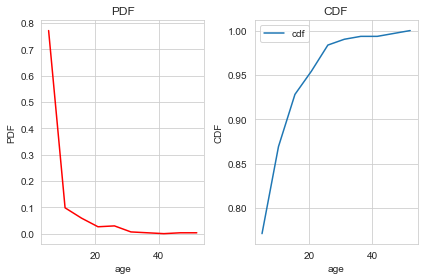

In [100]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
counts, bin_edges = np.histogram(df['nodes'], bins=10, 
                                 density = True)
pdf = (counts)/sum(counts)
cdf = np.cumsum(pdf)
axs[0].plot(bin_edges[1:],(pdf),label = 'pdf',color = 'red')
axs[0].set_title('PDF')
axs[0].set_xlabel('age')
axs[0].set_ylabel('PDF')

axs[1].plot(bin_edges[1:],cdf,label = 'cdf')
axs[1].set_title('CDF')
axs[1].set_xlabel('age')
axs[1].set_ylabel('CDF')
plt.legend()

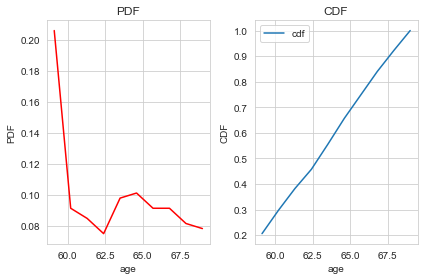

In [101]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
counts, bin_edges = np.histogram(df['year'], bins=10, 
                                 density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
axs[0].plot(bin_edges[1:],pdf,label = 'pdf',color = 'red')
axs[0].set_title('PDF')
axs[0].set_xlabel('age')
axs[0].set_ylabel('PDF')

axs[1].plot(bin_edges[1:],cdf,label = 'cdf')
axs[1].set_title('CDF')
axs[1].set_xlabel('age')
axs[1].set_ylabel('CDF')
plt.legend()

# Conclusions
1)Age follows a normal distribution,with most of the patients falling in around 50 mark

2)The distribution of nodes follows power law.

3)In the intial phases of study more patients were recruited which is understandable as study was beginning.

<AxesSubplot:xlabel='nodes', ylabel='Proportion'>

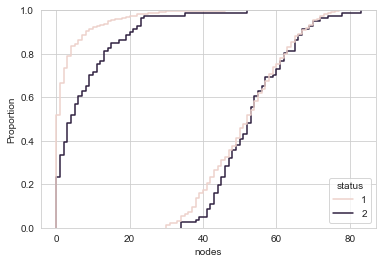

In [102]:
sn.ecdfplot(data=df, x="nodes",hue = 'status',color = 'blue')
sn.ecdfplot(data=df, x="age",hue = 'status')



* On further study of cdf of nodes and age we can conclude that nodes are best determinant of mortality.
* There's some difference in mortality for ages <= 50 but this can't be established now.

# Difference between 2 classes

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


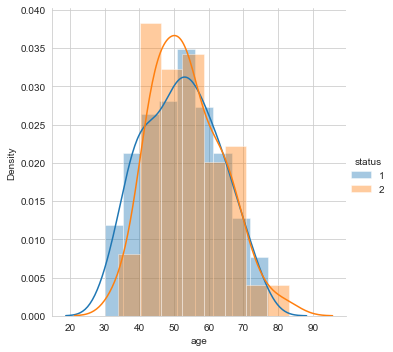

In [103]:
sn.FacetGrid(df,hue='status',size =5)\
   .map(sn.distplot,'age')\
.add_legend();

* Some separation can be seen for ages <40 between 2 classes

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


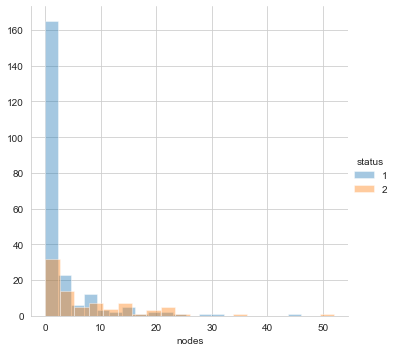

In [104]:
sn.FacetGrid(df,hue='status',height =5)\
   .map(sn.distplot,'nodes',bins =20,kde = False)\
.add_legend();

*** For around <= 3 nodes survivability is high.

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


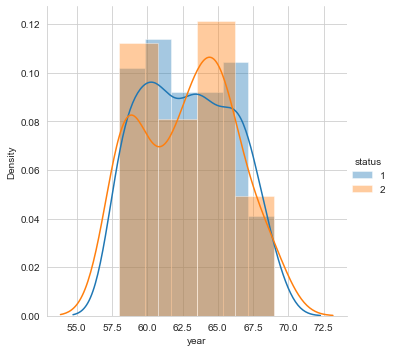

In [105]:
sn.FacetGrid(df,hue='status',size =5)\
   .map(sn.distplot,'year')\
.add_legend();

**No separtaion between 2 classes can be seen based upon year of inclusion into study.
**Also we can not form a plausibe hypothesis, even if we saw apattern. A case of data dredging.

# If no of nodes <= 3 survivability is high after that it decreases exponentially

In [106]:
print(df.groupby('status')['nodes'].mean())
print(df.groupby('status')['nodes'].median())

status
1    2.791111
2    7.456790
Name: nodes, dtype: float64
status
1    0.0
2    4.0
Name: nodes, dtype: float64


 It is evident that number of nodes is the most crucial predictor of survivability.
For group 2 mean > median, which points to positive skew. 
A few large points shift mean not median
We need to further enquire impact of nodes by setting 3 as cutoff value and comparing survivability above and below 3

In [107]:
df1 = df[df['nodes']<3.5 ]# below 2
df2 = df[(df['nodes']>3.5)]# above 2

In [108]:
df1.groupby('status')['age'].count()

status
1    178
2     39
Name: age, dtype: int64

In [109]:
surv,death =(df1.groupby('status')['age'].count()).iloc[0],(df1.groupby('status')['age'].count()).iloc[1]
print("Survivability percentage for nodes<= 3 is ",surv*100/(surv+death))

Survivability percentage for nodes<= 3 is  82.02764976958525


In [110]:
surv,death =(df2.groupby('status')['age'].count()).iloc[0],(df2.groupby('status')['age'].count()).iloc[1]
print("Survivability percentage for nodes >3 is ",surv*100/(surv+death))

Survivability percentage for nodes >3 is  52.80898876404494


 So for nodes <=3 survivability is 82 %
for > 3 is  52%.
Focussing on nodes alon we can say that if node is <4 86% likely to survive and node >4 then it's 50%.
`

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


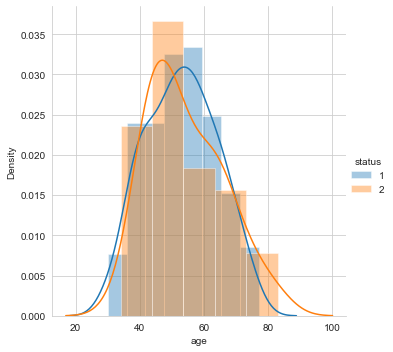

In [111]:
sn.FacetGrid(df1,hue='status',size =5)\
   .map(sn.distplot,'age')\
.add_legend();

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


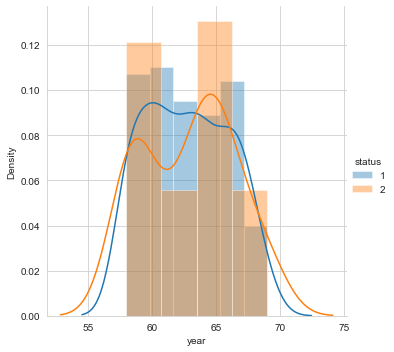

In [112]:
sn.FacetGrid(df1,hue='status',size =5)\
   .map(sn.distplot,'year')\
.add_legend();

# For nodes < 3 sepration based upon age is non existent as evident from density plot.


C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


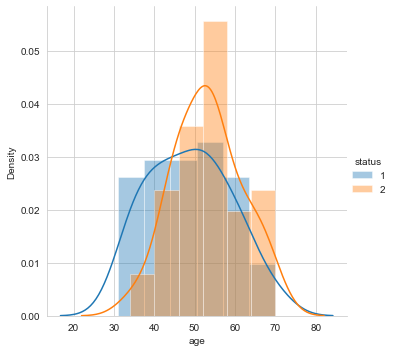

In [113]:
sn.FacetGrid(df2,hue='status',size =5)\
   .map(sn.distplot,'age')\
.add_legend()

We should try setting age 40 years as cutoff value and further break the data of nodes >3 into two groups

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


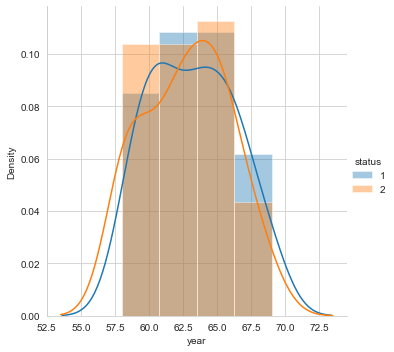

In [114]:
sn.FacetGrid(df2,hue='status',size =5)\
   .map(sn.distplot,'year')\
.add_legend()

In [126]:
dfage1 = df2[(df2['age']<40) | (df2['age']==40)]
dfage2 = df2[df2['age']>40]

In [127]:
surv,death =(dfage1.groupby('status')['age'].count()).iloc[0],(dfage1.groupby('status')['age'].count()).iloc[1]
print("Survivability percentage for nodes> 3 and age <40 is ",surv*100/(surv+death))

Survivability percentage for nodes> 3 and age <40 is  84.61538461538461


In [128]:
surv,death =(dfage2.groupby('status')['age'].count()).iloc[0],(dfage2.groupby('status')['age'].count()).iloc[1]
print("Survivability percentage for nodes> 3 and age >40 is ",surv*100/(surv+death))

Survivability percentage for nodes> 3 and age >40 is  47.36842105263158


# So for nodes > 3 and age <40 survivability is 84.6 % and nodes > 3 and age>40 survivability is 47%.
 
 * We have to keep in mind that dataset is unbalanced with 75% patients surviving so resulting model is going to favour the majority outcome.

C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shubh\Downloads\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


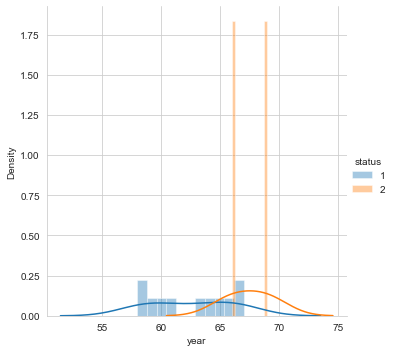

In [129]:
sn.FacetGrid(dfage1,hue='status',size =5)\
   .map(sn.distplot,'year',bins =11)\
.add_legend();

We can see that almost all patients who have died in group nodes > 3 and age>40 are in later years >1966 but year of observation should have no effect. if it had then there should have been increase in death after 1966 for whole group and not a subsection of it.
Also only 2 patients died out of 11, so  year here is meaningless noise.

Overfitting case.

# Building a model

In [130]:
df['predict']=2

In [131]:
c =0
b=0
for i in range(0,len(df)):
    if(df.iloc[i,2]> 3.5 and df.iloc[i,0]>39.9):
        df.iloc[i,4] = 2
        c=c+1
    else:
        df.iloc[i,4] = 1
        
      
print(c)

76


In [132]:
  df.groupby('predict').count()

,age,year,nodes,status
predict,,,,
1,230,230,230,230
2,76,76,76,76


In [133]:
c=0
for i in range(0,len(df)):
    if (df.iloc[i,3]==df.iloc[i,4]):
        c+=1
print(c)

229


In [134]:
print('Accuracy of model is',c*100/len(df))

Accuracy of model is 74.83660130718954


In [135]:
c=0
for i in range(0,len(df)):
    if (df.iloc[i,3]==1 and df.iloc[i,4]==1):
        c+=1
print("specifity is",c/225)

specifity is 0.84
